In [1]:
from tensorflow import keras
import glob
import cv2
import numpy as np
from matplotlib import pyplot as plt
import keras
from keras.utils import normalize
from keras.metrics import MeanIoU
import keras
import numpy as np
import pandas as pd
from glob import glob
import tensorflow as tf
print(tf.__version__)
import tensorflow.image as tfi
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img 
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


2.10.1


# Data loading and preprocessing:

شروع بارگذاری داده‌ها...
در حال پردازش پوشه: 2e99ee0e-506a-443b-8c16-e8a0619da2f7
در حال پردازش پوشه: bfd442e7-9299-4890-ad3d-c9d5b6534cbc
در حال پردازش پوشه: 0199616b-bdeb-4119-97a3-a5a3571bd641
در حال پردازش پوشه: dcdcb9a4-fec7-45a2-b2b7-a282f963c551
در حال پردازش پوشه: 484c03b0-441d-4966-b10e-06b31d84e55e
در حال پردازش پوشه: b9ef9a65-ab93-4714-a9e0-6df70ac8c285
در حال پردازش پوشه: d15a282b-25ca-40ab-915c-215335a0d3cf
در حال پردازش پوشه: e3670fa9-574c-4fbc-89af-f69aad63696d
در حال پردازش پوشه: 6fcb175f-52e4-4f3e-9956-f693b28f56e6
در حال پردازش پوشه: 7f689365-1782-4e41-b357-951d68cd3eee
در حال پردازش پوشه: 67d1dc32-1791-4595-937a-c51d4372c15c
در حال پردازش پوشه: 47540baa-7ab8-425a-9e77-8005cb1c02f4
در حال پردازش پوشه: 8ce68989-8856-4c3f-8988-4c9680b9a246
در حال پردازش پوشه: 229525cd-637a-4560-ad44-45b6f04a5d1f
در حال پردازش پوشه: f1fcabfc-f998-44c7-8420-c7a5ae5aaab7
در حال پردازش پوشه: 1b250c39-7217-4921-838b-ed2681ebfef2
در حال پردازش پوشه: 30555893-2ac6-45c9-b404-8ca2d9f90b05
در حال

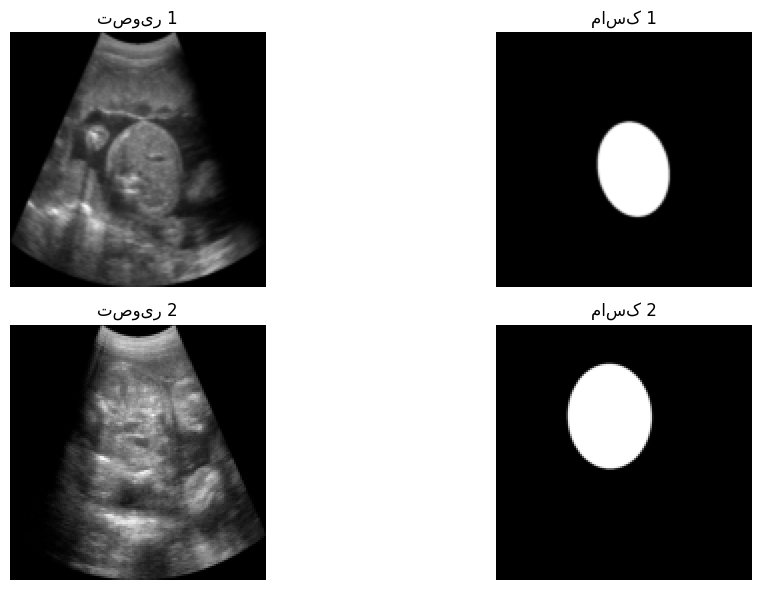

تعداد تصاویر: 2141
تعداد ماسک‌ها: 2141


In [2]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import SimpleITK as sitk
from skimage.transform import resize


base_dir = r"H:\drproject\New folder"
SIZE = 128  
image_paths = []
mask_paths = []


def load_patient_data(base_dir):
    print("شروع بارگذاری داده‌ها...")
    for patient_folder in os.listdir(base_dir):
        print(f"در حال پردازش پوشه: {patient_folder}")
        patient_path = os.path.join(base_dir, patient_folder)

        
        image_dir = os.path.join(patient_path, 'images')
        mask_dir = os.path.join(patient_path, 'masks')

        if os.path.exists(image_dir) and os.path.exists(mask_dir):
            for image_file in os.listdir(image_dir):
                image_path = os.path.join(image_dir, image_file)
                mask_path = os.path.join(mask_dir, image_file)

                if os.path.exists(mask_path):
                    image_paths.append(image_path)
                    mask_paths.append(mask_path)
                else:
                    print(f"ماسک برای {image_file} در {patient_folder} یافت نشد!")
        else:
            print(f"پوشه‌های images یا masks در {patient_folder} یافت نشد!")
    
    print("پایان بارگذاری داده‌ها.")
    return image_paths, mask_paths


image_paths, mask_paths = load_patient_data(base_dir)

print(f"تعداد تصاویر: {len(image_paths)}")
print(f"تعداد ماسک‌ها: {len(mask_paths)}")


def load_mha_image(image_path, target_size):
    image = sitk.ReadImage(image_path)
    image_array = sitk.GetArrayFromImage(image)
    image_array = preprocess_image(image_array, (target_size, target_size))
    return image_array


def preprocess_image(image_array, target_shape=(128, 128)):
    image_array = (image_array - np.min(image_array)) / (np.max(image_array) - np.min(image_array)) * 255.0
    if len(image_array.shape) == 3:
        resized_image = resize(image_array, (target_shape[0], target_shape[1], image_array.shape[0]), mode='constant', preserve_range=True)
        return np.expand_dims(resized_image, axis=-1)
    else:
        return np.expand_dims(resize(image_array, target_shape, mode='constant', preserve_range=True), axis=-1)


def show_images_and_masks(image_paths, mask_paths, num_images=2):
    plt.figure(figsize=(12, 6))
    indices = random.sample(range(len(image_paths)), num_images)
    
    for i in range(num_images):
        index = indices[i]
        image_array = load_mha_image(image_paths[index], SIZE)
        mask_array = load_mha_image(mask_paths[index], SIZE)
        
        # نمایش تصویر
        plt.subplot(num_images, 2, 2*i + 1)
        plt.imshow(image_array[:, :, 0], cmap='gray') if len(image_array.shape) == 3 else plt.imshow(image_array[:, :, 0], cmap='gray')
        plt.title(f"تصویر {i+1}")
        plt.axis('off')
        
        plt.subplot(num_images, 2, 2*i + 2)
        plt.imshow(mask_array[:, :, 0], cmap='gray') if len(mask_array.shape) == 3 else plt.imshow(mask_array[:, :, 0], cmap='gray')
        plt.title(f"ماسک {i+1}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()


show_images_and_masks(image_paths, mask_paths, num_images=2)


def load_images(image_paths, SIZE):
    images = np.zeros((len(image_paths), SIZE, SIZE, 1))

    for i, image_path in enumerate(image_paths):
        images[i] = load_mha_image(image_path, SIZE)
    
    return images


images = load_images(image_paths, SIZE)
masks = load_images(mask_paths, SIZE)

print(f"تعداد تصاویر: {len(images)}")
print(f"تعداد ماسک‌ها: {len(masks)}")


# Splitting dataset to test and train and data augmentation soley on malignant class:

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, masks, test_size = 0.3, random_state = 0)
# labels_train, labels_test = train_test_split(labels, test_size=0.3, random_state=0)


import cv2
import numpy as np
import tensorflow as tf


def dataAugmentation(images, masks, labels, target_size=(128, 128)):
    imagesupdate = []
    masksupdate = []
    benign_indices = np.where(labels == 0)[0]  # Get indices of the benign class
    malignant_indices = np.where(labels == 1)[0]  # Get indices of the malignant class
    
    # Append all benign class images without augmentation
    for idx in benign_indices:
        image = images[idx]
        mask = masks[idx]
        imageup = cv2.resize(image, target_size)
        maskup = cv2.resize(mask, target_size)
        imagesupdate.append(imageup)
        masksupdate.append(maskup)
    
    # Perform augmentation for the malignant class
    for idx in malignant_indices:
        image = images[idx]
        mask = masks[idx]
        for aug in range(8):  # Updated to include contrast adjustment
            imageup = cv2.resize(image, target_size)  # Resize the image
            maskup = cv2.resize(mask, target_size)    # Resize the mask
            if aug == 1:
                # Random rotation between -25 and 25 degrees
                angle = np.random.uniform(-45, 45)
                rows, cols = imageup.shape[:2]
                M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
                imageup = cv2.warpAffine(imageup, M, (cols, rows))
                maskup = cv2.warpAffine(maskup, M, (cols, rows))
            elif aug == 2:
                # Random horizontal flip
                imageup = cv2.flip(imageup, 1)
                maskup = cv2.flip(maskup, 1)
            elif aug == 3:
                # Random vertical flip
                imageup = cv2.flip(imageup, 0)
                maskup = cv2.flip(maskup, 0)
            elif aug == 4:
                # Zoom augmentation
                zoom_factor = np.random.uniform(1, 2)  # Adjust the zoom factor as needed
                zoomed_image = cv2.resize(imageup, None, fx=zoom_factor, fy=zoom_factor)
                zoomed_mask = cv2.resize(maskup, None, fx=zoom_factor, fy=zoom_factor)
                new_rows, new_cols = target_size[0], target_size[1]
                start_row = (zoomed_image.shape[0] - new_rows) // 2
                start_col = (zoomed_image.shape[1] - new_cols) // 2
                imageup = zoomed_image[start_row:start_row + new_rows, start_col:start_col + new_cols]
                maskup = zoomed_mask[start_row:start_row + new_rows, start_col:start_col + new_cols]
            elif aug == 5:
                # Shear augmentation
                shear_factor = np.random.uniform(-0.5, 0.5)  # Adjust the shear factor as needed
                rows, cols = imageup.shape[:2]
                shear_matrix = np.array([[1, shear_factor, 0], [0, 1, 0]], dtype=np.float32)
                imageup = cv2.warpAffine(imageup, shear_matrix, (cols, rows))
                maskup = cv2.warpAffine(maskup, shear_matrix, (cols, rows))
            elif aug == 6:
                # Brightness adjustment
                brightness_factor = np.random.uniform(0.5, 2.0)  # Adjust the brightness factor as needed
                imageup = cv2.convertScaleAbs(imageup, alpha=brightness_factor, beta=0)
            elif aug == 7:
                # Contrast adjustment
                contrast_factor = np.random.uniform(0.5, 1.5)  # Adjust the contrast factor as needed
                imageup = cv2.convertScaleAbs(imageup, alpha=contrast_factor, beta=0)
            else:
                # No augmentation, just append the original image and mask
                pass
            
            imagesupdate.append(imageup)
            masksupdate.append(maskup)
    
    return np.array(imagesupdate), np.array(masksupdate)




# X_train, y_train= dataAugmentation(X_train, y_train)
print("Train images shape after augmentation:", X_train.shape)
print("Train masks shape after augmentation:", y_train.shape)


print("Class values in the dataset are ... ", np.unique(y_train))  # 0 is the background/few unlabeled

threshold = 0.5  # Adjust this threshold as needed
# Assuming you have your masks in the 'masks' array
y_train = (y_train > threshold).astype(int)
y_test = (y_test > threshold).astype(int)
print("Class values in the dataset are ... ", np.unique(y_train))  # 0 is the background/few unlabeled

Train images shape after augmentation: (1498, 128, 128, 1)
Train masks shape after augmentation: (1498, 128, 128, 1)
Class values in the dataset are ...  [0.00000000e+00 8.56911148e-11 2.57073344e-10 ... 2.55000000e+02
 2.55000000e+02 2.55000000e+02]
Class values in the dataset are ...  [0 1]


# Defining the model:
I used this github link as my model: https://github.com/bnsreenu/python_for_microscopists/blob/master/224_225_226_models.py#L168

In [4]:
import tensorflow as tf
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras import backend as K
from keras.optimizers import Adam

#DICE METRIC
def dice_metric(y_true, y_pred):
    y_true_f = tf.reshape(tf.dtypes.cast(y_true, tf.float32), [-1])
    y_pred_f = tf.reshape(tf.dtypes.cast(y_pred, tf.float32), [-1])
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    return (2. * intersection + 1.) / (tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) + 1.)

#iou METRIC
def iou_metric(y_true, y_pred):
    y_true_f = tf.reshape(tf.dtypes.cast(y_true, tf.float32), [-1])
    y_pred_f = tf.reshape(tf.dtypes.cast(y_pred, tf.float32), [-1])
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    union = tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) - intersection
    return (intersection + 1.) / (union + 1.)


def f1_score(y_true, y_pred):
    # Calculate true positives, false positives, and false negatives
    tp = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    fp = K.sum(K.round(K.clip(y_pred - y_true, 0, 1)))
    fn = K.sum(K.round(K.clip(y_true - y_pred, 0, 1)))
    
    # Calculate precision and recall
    precision = tp / (tp + fp + K.epsilon())
    recall = tp / (tp + fn + K.epsilon())
    
    # Calculate F1 score
    f1_score = 2 * (precision * recall) / (precision + recall + K.epsilon())
    return f1_score


def iou_loss(y_true, y_pred, smooth=1):
    intersection = tf.reduce_sum(y_true * y_pred)
    union = tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) - intersection
    iou = (intersection + smooth) / (union + smooth)
    return 1 - iou  # Minimize (1 - IoU) as loss



def conv_block(x, filter_size, size, dropout, batch_norm=False):
    conv = layers.Conv2D(size, (filter_size, filter_size), padding="same")(x)
    if batch_norm is True:
        conv = layers.BatchNormalization(axis=3)(conv)
    conv = layers.Activation("relu")(conv)

    conv = layers.Conv2D(size, (filter_size, filter_size), padding="same")(conv)
    if batch_norm is True:
        conv = layers.BatchNormalization(axis=3)(conv)
    conv = layers.Activation("relu")(conv)
    
    if dropout > 0:
        conv = layers.Dropout(dropout)(conv)

    return conv

def res_conv_block(x, filter_size, size, dropout, batch_norm=False):
    conv = layers.Conv2D(size, (filter_size, filter_size), padding='same')(x)
    if batch_norm is True:
        conv = layers.BatchNormalization(axis=3)(conv)
    conv = layers.Activation('relu')(conv)
    
    conv = layers.Conv2D(size, (filter_size, filter_size), padding='same')(conv)
    if batch_norm is True:
        conv = layers.BatchNormalization(axis=3)(conv)
    if dropout > 0:
        conv = layers.Dropout(dropout)(conv)

    shortcut = layers.Conv2D(size, kernel_size=(1, 1), padding='same')(x)
    if batch_norm is True:
        shortcut = layers.BatchNormalization(axis=3)(shortcut)

    res_path = layers.add([shortcut, conv])
    res_path = layers.Activation('relu')(res_path)
    return res_path

def gating_signal(input, out_size, batch_norm=False):
    x = layers.Conv2D(out_size, (1, 1), padding='same')(input)
    if batch_norm:
        x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    return x

def Attention_ResUNet(input_shape, NUM_CLASSES=1, dropout_rate=0.07, batch_norm=True):
    FILTER_NUM = 16  # Reduced number of filters
    FILTER_SIZE = 3  # Same filter size
    UP_SAMP_SIZE = 2

    inputs = layers.Input(input_shape, dtype=tf.float32)
    axis = 3

    conv_128 = res_conv_block(inputs, FILTER_SIZE, FILTER_NUM, dropout_rate, batch_norm)
    pool_64 = layers.MaxPooling2D(pool_size=(2, 2))(conv_128)
    conv_64 = res_conv_block(pool_64, FILTER_SIZE, 2 * FILTER_NUM, dropout_rate, batch_norm)
    pool_32 = layers.MaxPooling2D(pool_size=(2, 2))(conv_64)
    conv_32 = res_conv_block(pool_32, FILTER_SIZE, 4 * FILTER_NUM, dropout_rate, batch_norm)
    pool_16 = layers.MaxPooling2D(pool_size=(2, 2))(conv_32)
    conv_16 = res_conv_block(pool_16, FILTER_SIZE, 8 * FILTER_NUM, dropout_rate, batch_norm)
    pool_8 = layers.MaxPooling2D(pool_size=(2, 2))(conv_16)

    conv_8 = res_conv_block(pool_8, FILTER_SIZE, 16 * FILTER_NUM, dropout_rate, batch_norm)

    gating_16 = gating_signal(conv_8, 8 * FILTER_NUM, batch_norm)
    att_16 = conv_block(conv_16, FILTER_SIZE, 8 * FILTER_NUM, dropout_rate, batch_norm)
    up_16 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(conv_8)
    up_16 = layers.concatenate([up_16, att_16], axis=axis)
    up_conv_16 = res_conv_block(up_16, FILTER_SIZE, 8 * FILTER_NUM, dropout_rate, batch_norm)

    gating_32 = gating_signal(up_conv_16, 4 * FILTER_NUM, batch_norm)
    att_32 = conv_block(conv_32, FILTER_SIZE, 4 * FILTER_NUM, dropout_rate, batch_norm)
    up_32 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(up_conv_16)
    up_32 = layers.concatenate([up_32, att_32], axis=axis)
    up_conv_32 = res_conv_block(up_32, FILTER_SIZE, 4 * FILTER_NUM, dropout_rate, batch_norm)

    gating_64 = gating_signal(up_conv_32, 2 * FILTER_NUM, batch_norm)
    att_64 = conv_block(conv_64, FILTER_SIZE, 2 * FILTER_NUM, dropout_rate, batch_norm)
    up_64 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(up_conv_32)
    up_64 = layers.concatenate([up_64, att_64], axis=axis)
    up_conv_64 = res_conv_block(up_64, FILTER_SIZE, 2 * FILTER_NUM, dropout_rate, batch_norm)

    gating_128 = gating_signal(up_conv_64, FILTER_NUM, batch_norm)
    att_128 = conv_block(conv_128, FILTER_SIZE, FILTER_NUM, dropout_rate, batch_norm)
    up_128 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(up_conv_64)
    up_128 = layers.concatenate([up_128, att_128], axis=axis)
    up_conv_128 = res_conv_block(up_128, FILTER_SIZE, FILTER_NUM, dropout_rate, batch_norm)

    conv_final = layers.Conv2D(NUM_CLASSES, kernel_size=(1, 1))(up_conv_128)
    conv_final = layers.BatchNormalization(axis=axis)(conv_final)
    conv_final = layers.Activation('sigmoid')(conv_final)

    model = models.Model(inputs, conv_final, name="AttentionResUNet")
    return model


input_shape = (128,128,1)
input_data_type = tf.float32

model=Attention_ResUNet(input_shape, NUM_CLASSES=1, dropout_rate=0.07, batch_norm=True)
model.compile(optimizer=Adam(learning_rate=1e-3), loss=iou_loss, metrics=['accuracy', iou_metric, dice_metric, f1_score])
model.summary()

Model: "AttentionResUNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 16  160         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 128, 128, 16  64         ['conv2d[0][0]']                 
 alization)                     )                                                  

# Training the model:

In [5]:
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

BATCH_SIZE = 16
SPE = len(X_train)//BATCH_SIZE

from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
filepath = "best_model.h5"


checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model_iou.h5',
                                                monitor='val_iou_metric',
                                                mode='max',
                                                save_best_only=True,
                                                verbose=1)

early_stopping = EarlyStopping(monitor='iou_metric', patience=10, mode='max', verbose=1)

from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    horizontal_flip=True,
    fill_mode='reflect'
)

from keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-7)
BATCH_SIZE = 16
SPE = len(X_train) // BATCH_SIZE

# Training
results = model.fit(
    datagen.flow(X_train, y_train, batch_size=BATCH_SIZE),
    validation_data=(X_test, y_test),
    epochs=150,
    steps_per_epoch=SPE,
    callbacks=[checkpoint, reduce_lr, early_stopping]
)


Epoch 1/150
93/93 [==============================] - ETA: 0s - loss: 0.7713 - accuracy: 0.8298 - iou_metric: 0.2287 - dice_metric: 0.3718 - f1_score: 0.6082
Epoch 1: val_iou_metric improved from -inf to 0.21972, saving model to best_model_iou.h5
93/93 [==============================] - 17s 111ms/step - loss: 0.7713 - accuracy: 0.8298 - iou_metric: 0.2287 - dice_metric: 0.3718 - f1_score: 0.6082 - val_loss: 0.7778 - val_accuracy: 0.7055 - val_iou_metric: 0.2197 - val_dice_metric: 0.3598 - val_f1_score: 0.4612 - lr: 0.0010
Epoch 2/150
93/93 [==============================] - ETA: 0s - loss: 0.7470 - accuracy: 0.8664 - iou_metric: 0.2529 - dice_metric: 0.4033 - f1_score: 0.6659
Epoch 2: val_iou_metric improved from 0.21972 to 0.26563, saving model to best_model_iou.h5
93/93 [==============================] - 9s 95ms/step - loss: 0.7470 - accuracy: 0.8664 - iou_metric: 0.2529 - dice_metric: 0.4033 - f1_score: 0.6659 - val_loss: 0.7310 - val_accuracy: 0.8244 - val_iou_metric: 0.2656 - val_d

In [6]:
model_path = r"H:\drproject"
model.save(model_path)

INFO:tensorflow:Assets written to: H:\drproject\assets


INFO:tensorflow:Assets written to: H:\drproject\assets


In [7]:
# Find best and worst metrics
best_epoch_val_loss = np.argmin(results.history['val_loss']) + 1
worst_epoch_val_loss = np.argmax(results.history['val_loss']) + 1
best_val_loss = np.min(results.history['val_loss'])
worst_val_loss = np.max(results.history['val_loss'])

best_epoch_train_loss = np.argmin(results.history['loss']) + 1
worst_epoch_train_loss = np.argmax(results.history['loss']) + 1
best_train_loss = np.min(results.history['loss'])
worst_train_loss = np.max(results.history['loss'])

best_epoch_val_iou = np.argmax(results.history['val_iou_metric']) + 1
worst_epoch_val_iou = np.argmin(results.history['val_iou_metric']) + 1
best_val_iou = np.max(results.history['val_iou_metric'])
worst_val_iou = np.min(results.history['val_iou_metric'])

best_epoch_train_iou = np.argmax(results.history['iou_metric']) + 1
worst_epoch_train_iou = np.argmin(results.history['iou_metric']) + 1
best_train_iou = np.max(results.history['iou_metric'])
worst_train_iou = np.min(results.history['iou_metric'])

best_epoch_val_accuracy = np.argmax(results.history['val_accuracy']) + 1
worst_epoch_val_accuracy = np.argmin(results.history['val_accuracy']) + 1
best_val_accuracy = np.max(results.history['val_accuracy'])
worst_val_accuracy = np.min(results.history['val_accuracy'])

best_epoch_train_accuracy = np.argmax(results.history['accuracy']) + 1
worst_epoch_train_accuracy = np.argmin(results.history['accuracy']) + 1
best_train_accuracy = np.max(results.history['accuracy'])
worst_train_accuracy = np.min(results.history['accuracy'])
# Find best and worst metrics for Dice coefficient
best_epoch_val_dice = np.argmax(results.history['val_dice_metric']) + 1
worst_epoch_val_dice = np.argmin(results.history['val_dice_metric']) + 1
best_val_dice = np.max(results.history['val_dice_metric'])
worst_val_dice = np.min(results.history['val_dice_metric'])

best_epoch_train_dice = np.argmax(results.history['dice_metric']) + 1
worst_epoch_train_dice = np.argmin(results.history['dice_metric']) + 1
best_train_dice = np.max(results.history['dice_metric'])
worst_train_dice = np.min(results.history['dice_metric'])

print("Validation Dice Coefficient - Best: Epoch {}, Value {:.4f}".format(best_epoch_val_dice, best_val_dice))
# print("Validation Dice Coefficient - Worst: Epoch {}, Value {:.4f}".format(worst_epoch_val_dice, worst_val_dice))
print("Training Dice Coefficient - Best: Epoch {}, Value {:.4f}".format(best_epoch_train_dice, best_train_dice))
# print("Training Dice Coefficient - Worst: Epoch {}, Value {:.4f}".format(worst_epoch_train_dice, worst_train_dice))

print("Validation Loss - Best: Epoch {}, Value {:.4f}, Accuracy {:.4f}".format(best_epoch_val_loss, best_val_loss, best_val_accuracy))
# print("Validation Loss - Worst: Epoch {}, Value {:.4f}, Accuracy {:.4f}".format(worst_epoch_val_loss, worst_val_loss, worst_val_accuracy))
print("Training Loss - Best: Epoch {}, Value {:.4f}, Accuracy {:.4f}".format(best_epoch_train_loss, best_train_loss, best_train_accuracy))
# print("Training Loss - Worst: Epoch {}, Value {:.4f}, Accuracy {:.4f}".format(worst_epoch_train_loss, worst_train_loss, worst_train_accuracy))

print("Validation IOU - Best: Epoch {}, Value {:.4f}".format(best_epoch_val_iou, best_val_iou))
# print("Validation IOU - Worst: Epoch {}, Value {:.4f}".format(worst_epoch_val_iou, worst_val_iou))
print("Training IOU - Best: Epoch {}, Value {:.4f}".format(best_epoch_train_iou, best_train_iou))
# print("Training IOU - Worst: Epoch {}, Value {:.4f}".format(worst_epoch_train_iou, worst_train_iou))


Validation Dice Coefficient - Best: Epoch 148, Value 0.9817
Training Dice Coefficient - Best: Epoch 150, Value 0.9927
Validation Loss - Best: Epoch 148, Value 0.0364, Accuracy 0.9954
Training Loss - Best: Epoch 150, Value 0.0145, Accuracy 0.9986
Validation IOU - Best: Epoch 148, Value 0.9640
Training IOU - Best: Epoch 150, Value 0.9855


# ploting the training and validation accuracy and loss at each epoch:
I have difficulties improving the validaiton recall, I welcome suggestions!


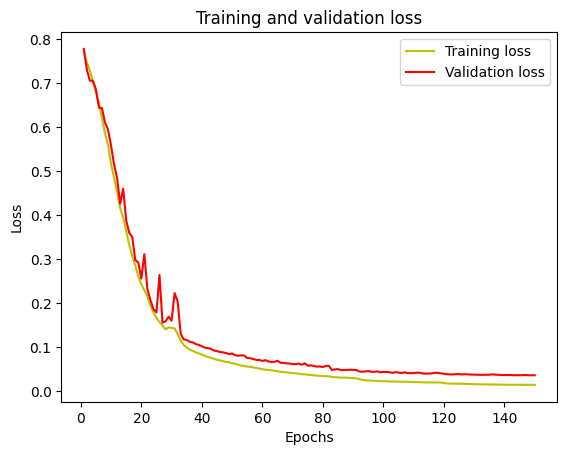

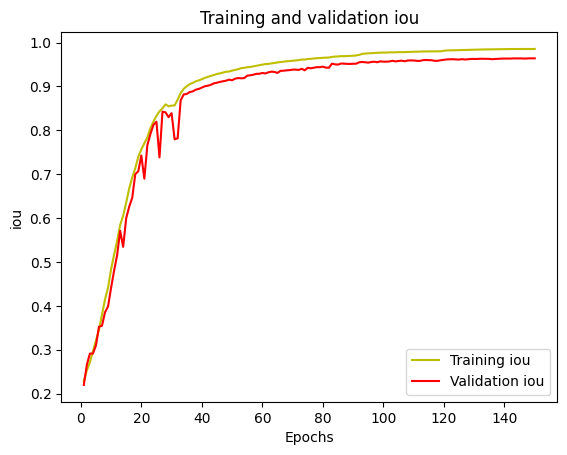

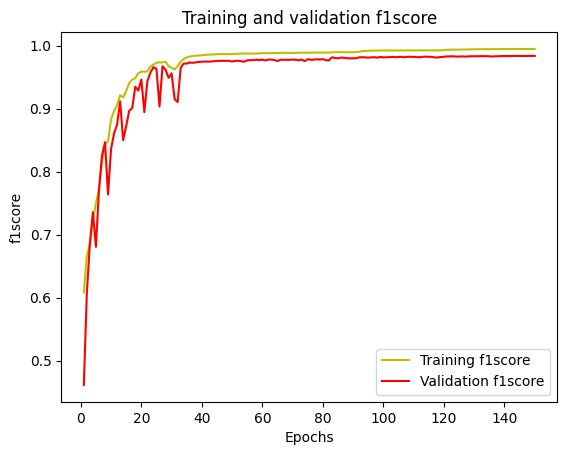

In [8]:
loss = results.history['loss']
val_loss = results.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

iou = results.history['iou_metric']
val_iou = results.history['val_iou_metric']


plt.plot(epochs, iou, 'y', label='Training iou')
plt.plot(epochs, val_iou, 'r', label='Validation iou')
plt.title('Training and validation iou')
plt.xlabel('Epochs')
plt.ylabel('iou')
plt.legend()
plt.show()


f1 = results.history['f1_score']
val_f1 = results.history['val_f1_score']


plt.plot(epochs, f1, 'y', label='Training f1score')
plt.plot(epochs, val_f1, 'r', label='Validation f1score')
plt.title('Training and validation f1score')
plt.xlabel('Epochs')
plt.ylabel('f1score')
plt.legend()
plt.show()




# Visualizing some random predictions for evaluation purposes:

1/1 [==============================] - 1s 551ms/step
Avg IoU for image 3: 0.9904046975005699
1/1 [==============================] - 0s 20ms/step
Avg IoU for image 6: 0.9344327409554936
1/1 [==============================] - 0s 22ms/step
Avg IoU for image 9: 0.9761508948355718
1/1 [==============================] - 0s 20ms/step
Avg IoU for image 12: 0.8930064666141623
1/1 [==============================] - 0s 23ms/step
Avg IoU for image 15: 0.984544853934056


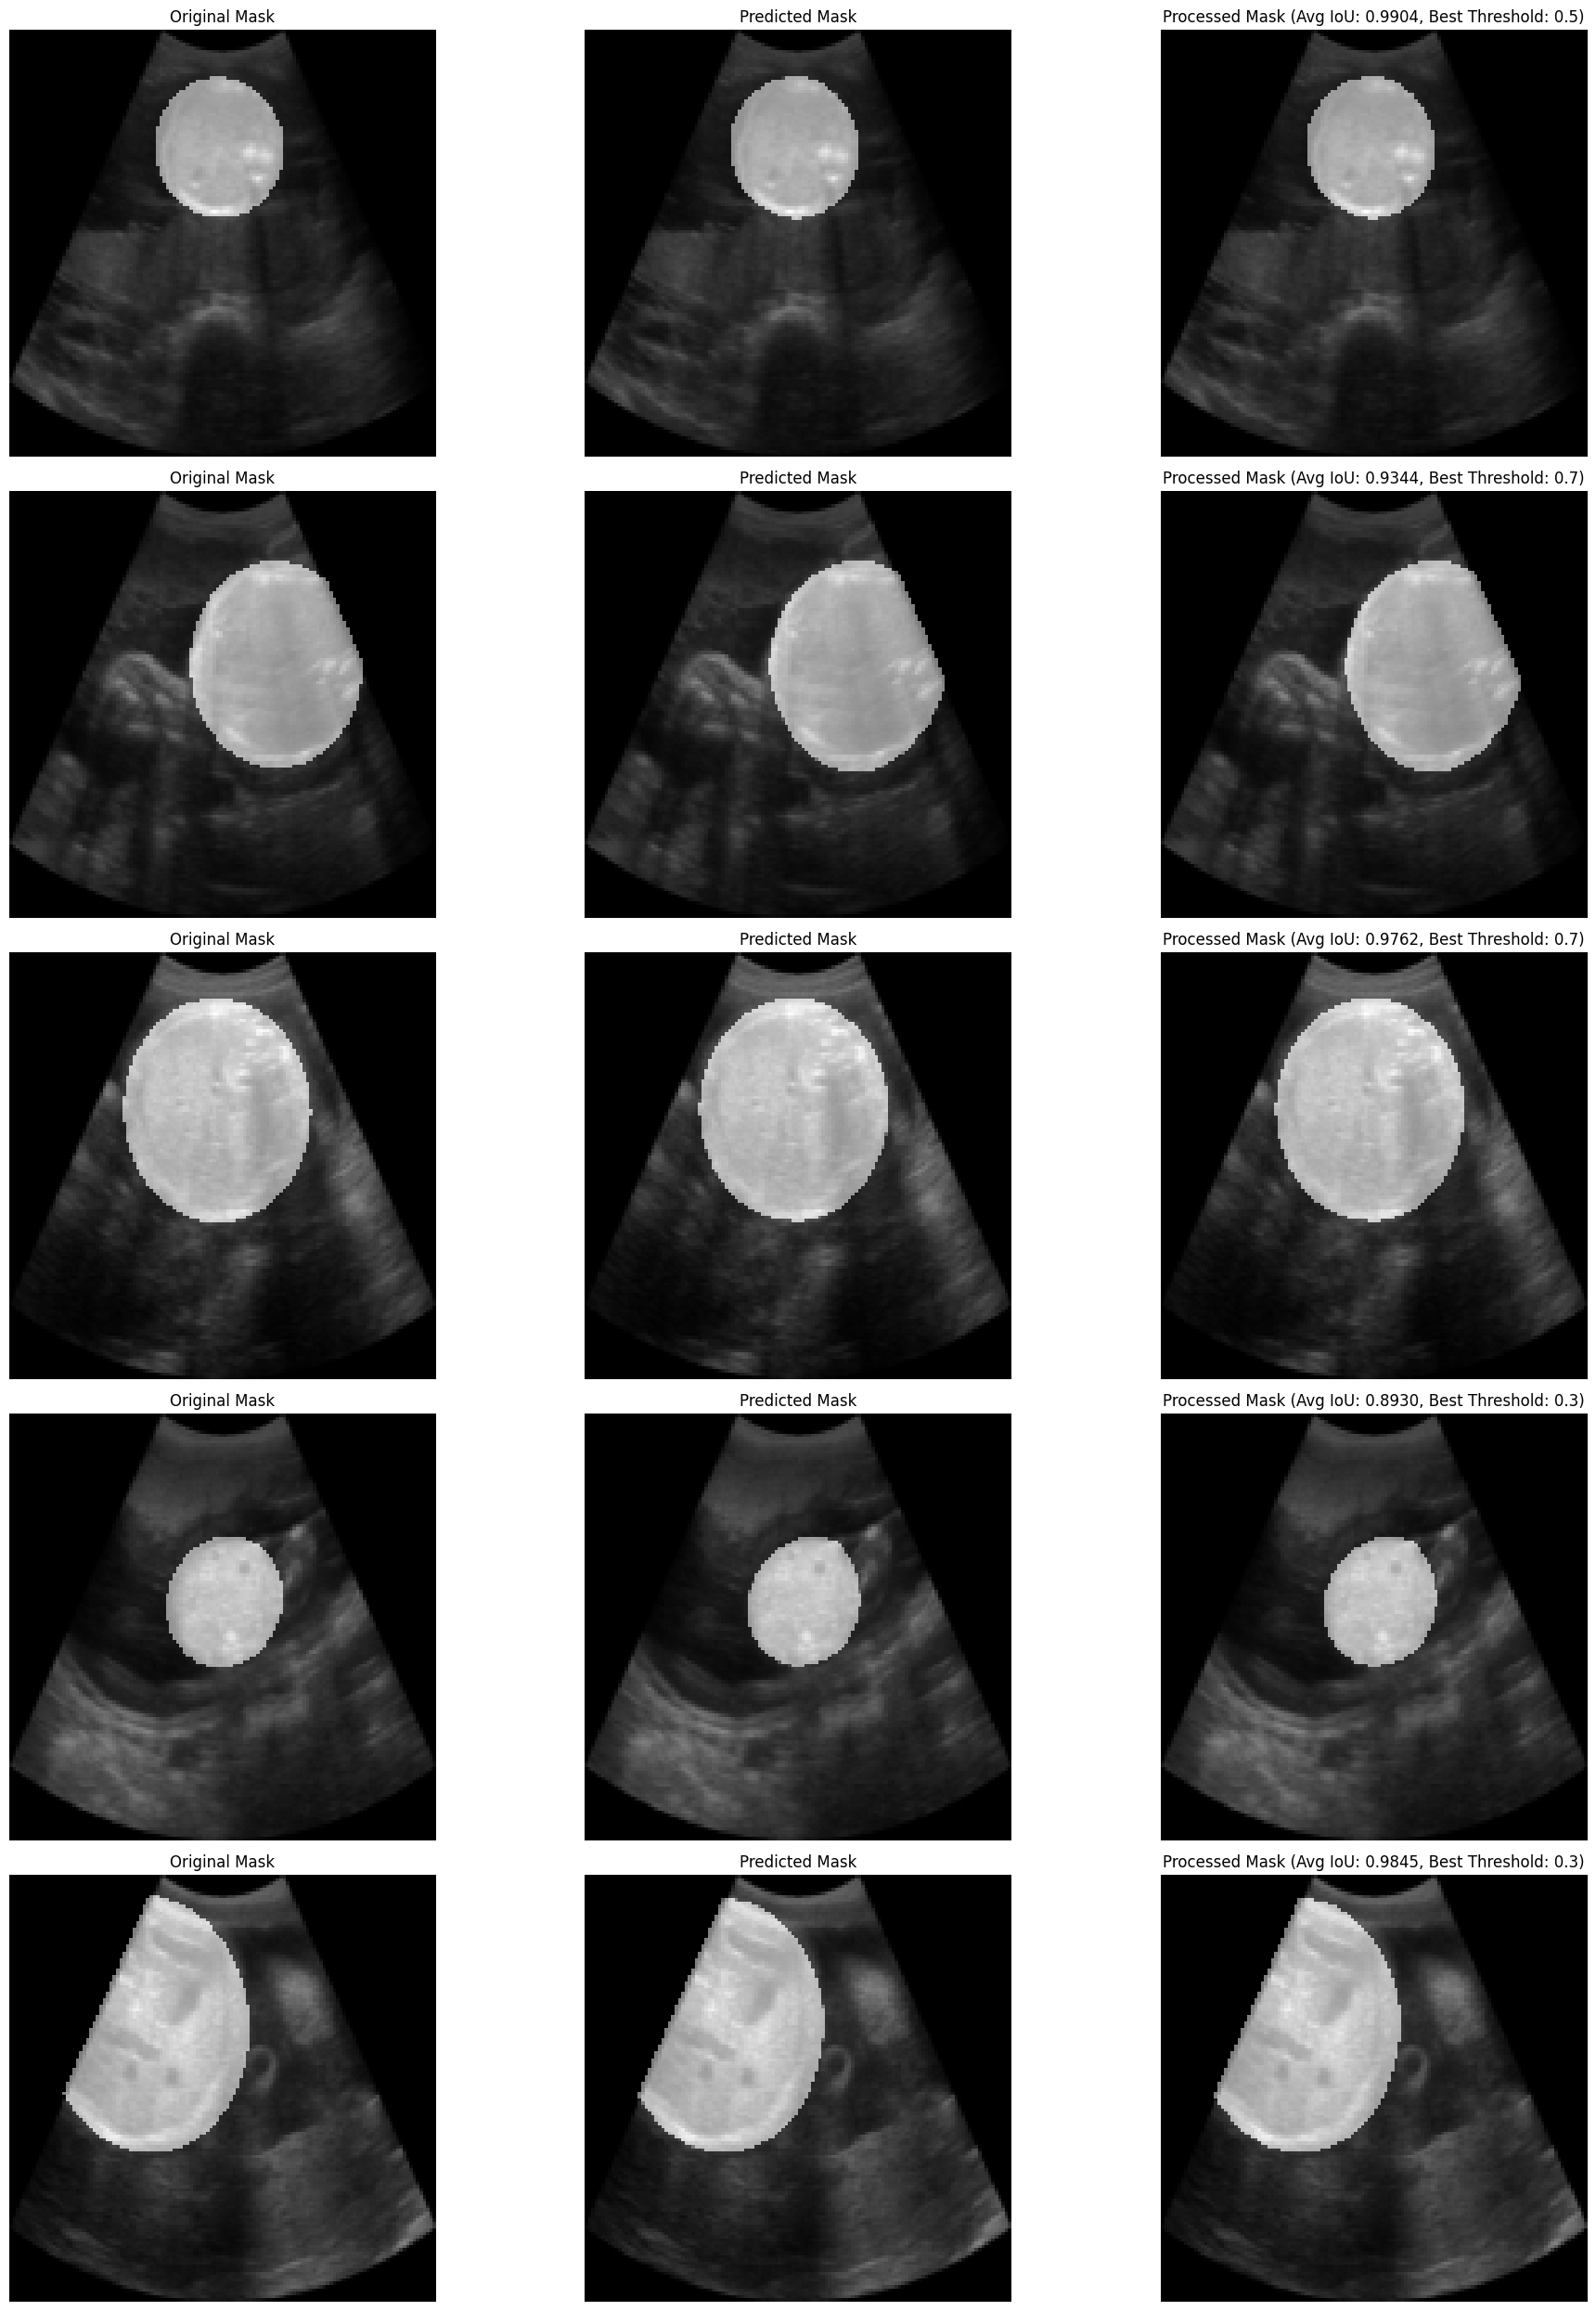

Best IoU: 0.9904 with threshold: 0.3


In [10]:
from sklearn.metrics import accuracy_score
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

best_model = load_model('best_model_iou.h5', compile=False)

def apply_threshold(pred_mask, threshold):
    """Apply a threshold to the predicted mask."""
    processed_mask = (pred_mask > threshold).astype('float')
    return processed_mask

def show_mask(image, mask, cmap='gray', alpha=0.5):
    """Display the mask with the specified alpha."""
    plt.imshow(np.squeeze(image), cmap='gray')
    plt.imshow(np.squeeze(mask), cmap=cmap, alpha=alpha)
    plt.axis('off')

plt.figure(figsize=(20, 25))
n = 0

best_iou = 0
best_threshold = 0

for i in range(1, (5 * 3) + 1):
    plt.subplot(5, 3, i)
    
    if n == 0:
        idx = np.random.randint(len(X_test))  
        image = X_test[idx]
        mask = y_test[idx]
        pred_mask = best_model.predict(image[np.newaxis, ...])  

        plt.title("Original Mask")
        show_mask(image, mask)
        n += 1
    elif n == 1:
        plt.title("Predicted Mask")
        show_mask(image, pred_mask[0]) 
        n += 1
    elif n == 2:
        thresholds = [0.3, 0.5, 0.7]  
        iou_values = []

        for threshold in thresholds:
            processed_mask = apply_threshold(pred_mask[0], threshold)

            intersection = np.logical_and(mask, processed_mask).sum()
            union = np.logical_or(mask, processed_mask).sum()
            iou = intersection / union if union != 0 else 0

            iou_values.append(iou)

        avg_iou = np.mean(iou_values)
        print(f"Avg IoU for image {i}: {avg_iou}")

        best_idx = np.argmax(iou_values)
        best_threshold = thresholds[best_idx]
        best_processed_mask = apply_threshold(pred_mask[0], best_threshold)

        plt.title(f"Processed Mask (Avg IoU: {avg_iou:.4f}, Best Threshold: {best_threshold})")
        show_mask(image, best_processed_mask)
        n = 0

        if avg_iou > best_iou:
            best_iou = avg_iou
            best_threshold = best_threshold

plt.tight_layout()
plt.show()

print(f"Best IoU: {best_iou:.4f} with threshold: {best_threshold}")
